# Image segmentation using clustering

### Submitted by: Vatsalya Gupta, SC19B098, B.Tech. ECE VII Sem

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def my_pdist2(A,B):
    return np.sum((A[:,None,:]-B[None,:,:])**2,axis=-1)

In [3]:
def my_kmeans(A,k,iters):
    A_min = np.min(A,axis=0)
    A_max = np.max(A,axis=0)

    mean_init = (A_min+A_max)/2
    theta = np.linalg.norm(mean_init-A_max)/2
    cov_init = np.zeros((len(mean_init),len(mean_init)))
    for m in range(len(cov_init)):
        cov_init[m,m] = theta

    ids = np.zeros(len(A))
    means = np.random.multivariate_normal(mean_init,cov_init,k)

    for _ in range(iters):
        distances = my_pdist2(A,means)
        ids = np.argmin(distances,axis=1)
        means = np.vstack([np.average(A[ids==i],axis=0) for i in np.unique(ids)])

    ssd = np.sum(np.min(my_pdist2(A,means),axis=1))
    
    return ids,means,ssd

In [4]:
def restarts(A,k,iters,R):
    ssd = float("inf")
    for _ in range(R):
        ids2,means2,ssd2 = my_kmeans(A,k,iters)
        if ssd2<ssd:
            ids = ids2
            means = means2
            ssd = ssd2
    
    return ids,means,ssd

In [5]:
def segment(image_original, k, iters, R, plot = True):
    image_data = np.reshape(image_original, (-1, image_original.shape[2]))
    ids, means, _ = restarts(image_data, k, iters, R)

    image_segmented = np.uint8(means[ids])
    image_segmented = image_segmented.reshape(image_original.shape)

    return image_segmented

In [6]:
def run_segmentation(k,iters,R):
    panda_original = cv2.imread("panda.jpg")
    panda_original = cv2.cvtColor(panda_original,cv2.COLOR_BGR2RGB)
    
    cardinal_original = cv2.imread("cardinal.jpg")
    cardinal_original = cv2.cvtColor(cardinal_original,cv2.COLOR_BGR2RGB)

    panda_original = cv2.resize(panda_original,(100,100))
    cardinal_original = cv2.resize(cardinal_original,(100,100))
    
    panda_segmented = segment(panda_original,k,iters,R)
    cardinal_segmented = segment(cardinal_original,k,iters,R)

    fig,axes = plt.subplots(1,2)
    axes[0].imshow(panda_segmented)
    axes[1].imshow(cardinal_segmented)
    
    return fig,axes

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

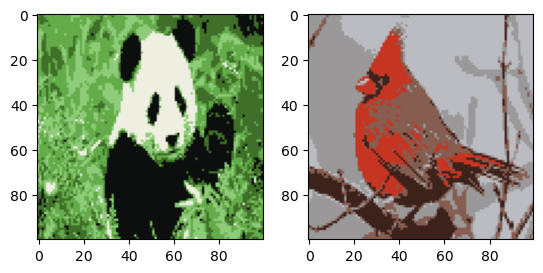

In [7]:
# Case - 1

k = 5
iters = 10
R = 5

run_segmentation(k,iters,R)

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

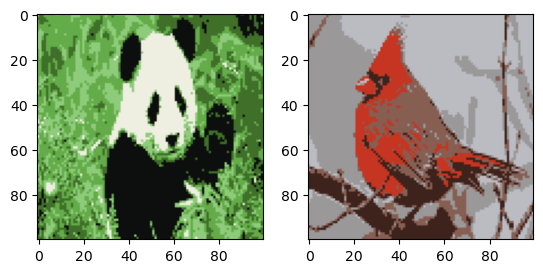

In [8]:
# Case - 2

k = 5
iters = 100
R = 5

run_segmentation(k,iters,R)

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

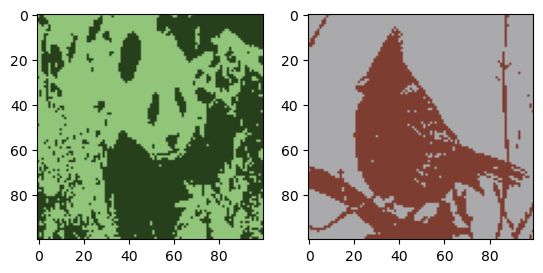

In [9]:
# Case - 3

k = 2
iters = 10
R = 5

run_segmentation(k,iters,R)

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

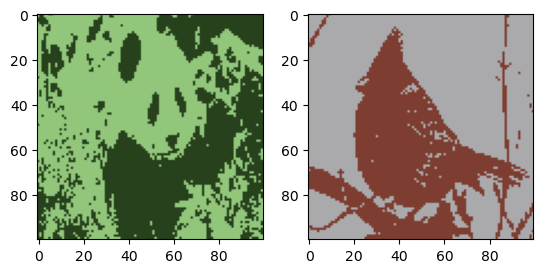

In [10]:
# Case - 4

k = 2
iters = 10
R = 15

run_segmentation(k,iters,R)

(<Figure size 640x480 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

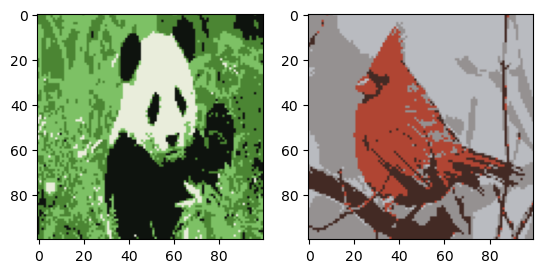

In [11]:
# Case - 4

k = 4
iters = 30
R = 15

run_segmentation(k,iters,R)